# Step 1: Loading and understanding the data

In [140]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

In [141]:
# Importing bike sharing data day.csv
bike =  pd.read_csv('day.csv')

In [142]:
# Looking at the first five rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## inspect various aspect of the dataframe

In [143]:
bike.shape

(730, 16)

In [144]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [145]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [146]:
# Converting 'season' and 'weathersit' to categorical variables
bike['season'] = bike['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike['weathersit'] = bike['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})

# Preview the changes to ensure correct conversion
bike[['season', 'weathersit']].head()


,season,weathersit
0,Spring,Mist
1,Spring,Mist
2,Spring,Clear
3,Spring,Clear
4,Spring,Clear


In [147]:
bike_numerical = bike[['cnt','temp','atemp','hum','windspeed','yr','mnth','weekday']]

# Step 2 : Visualising the data

### Lets make pairplot for numerical data

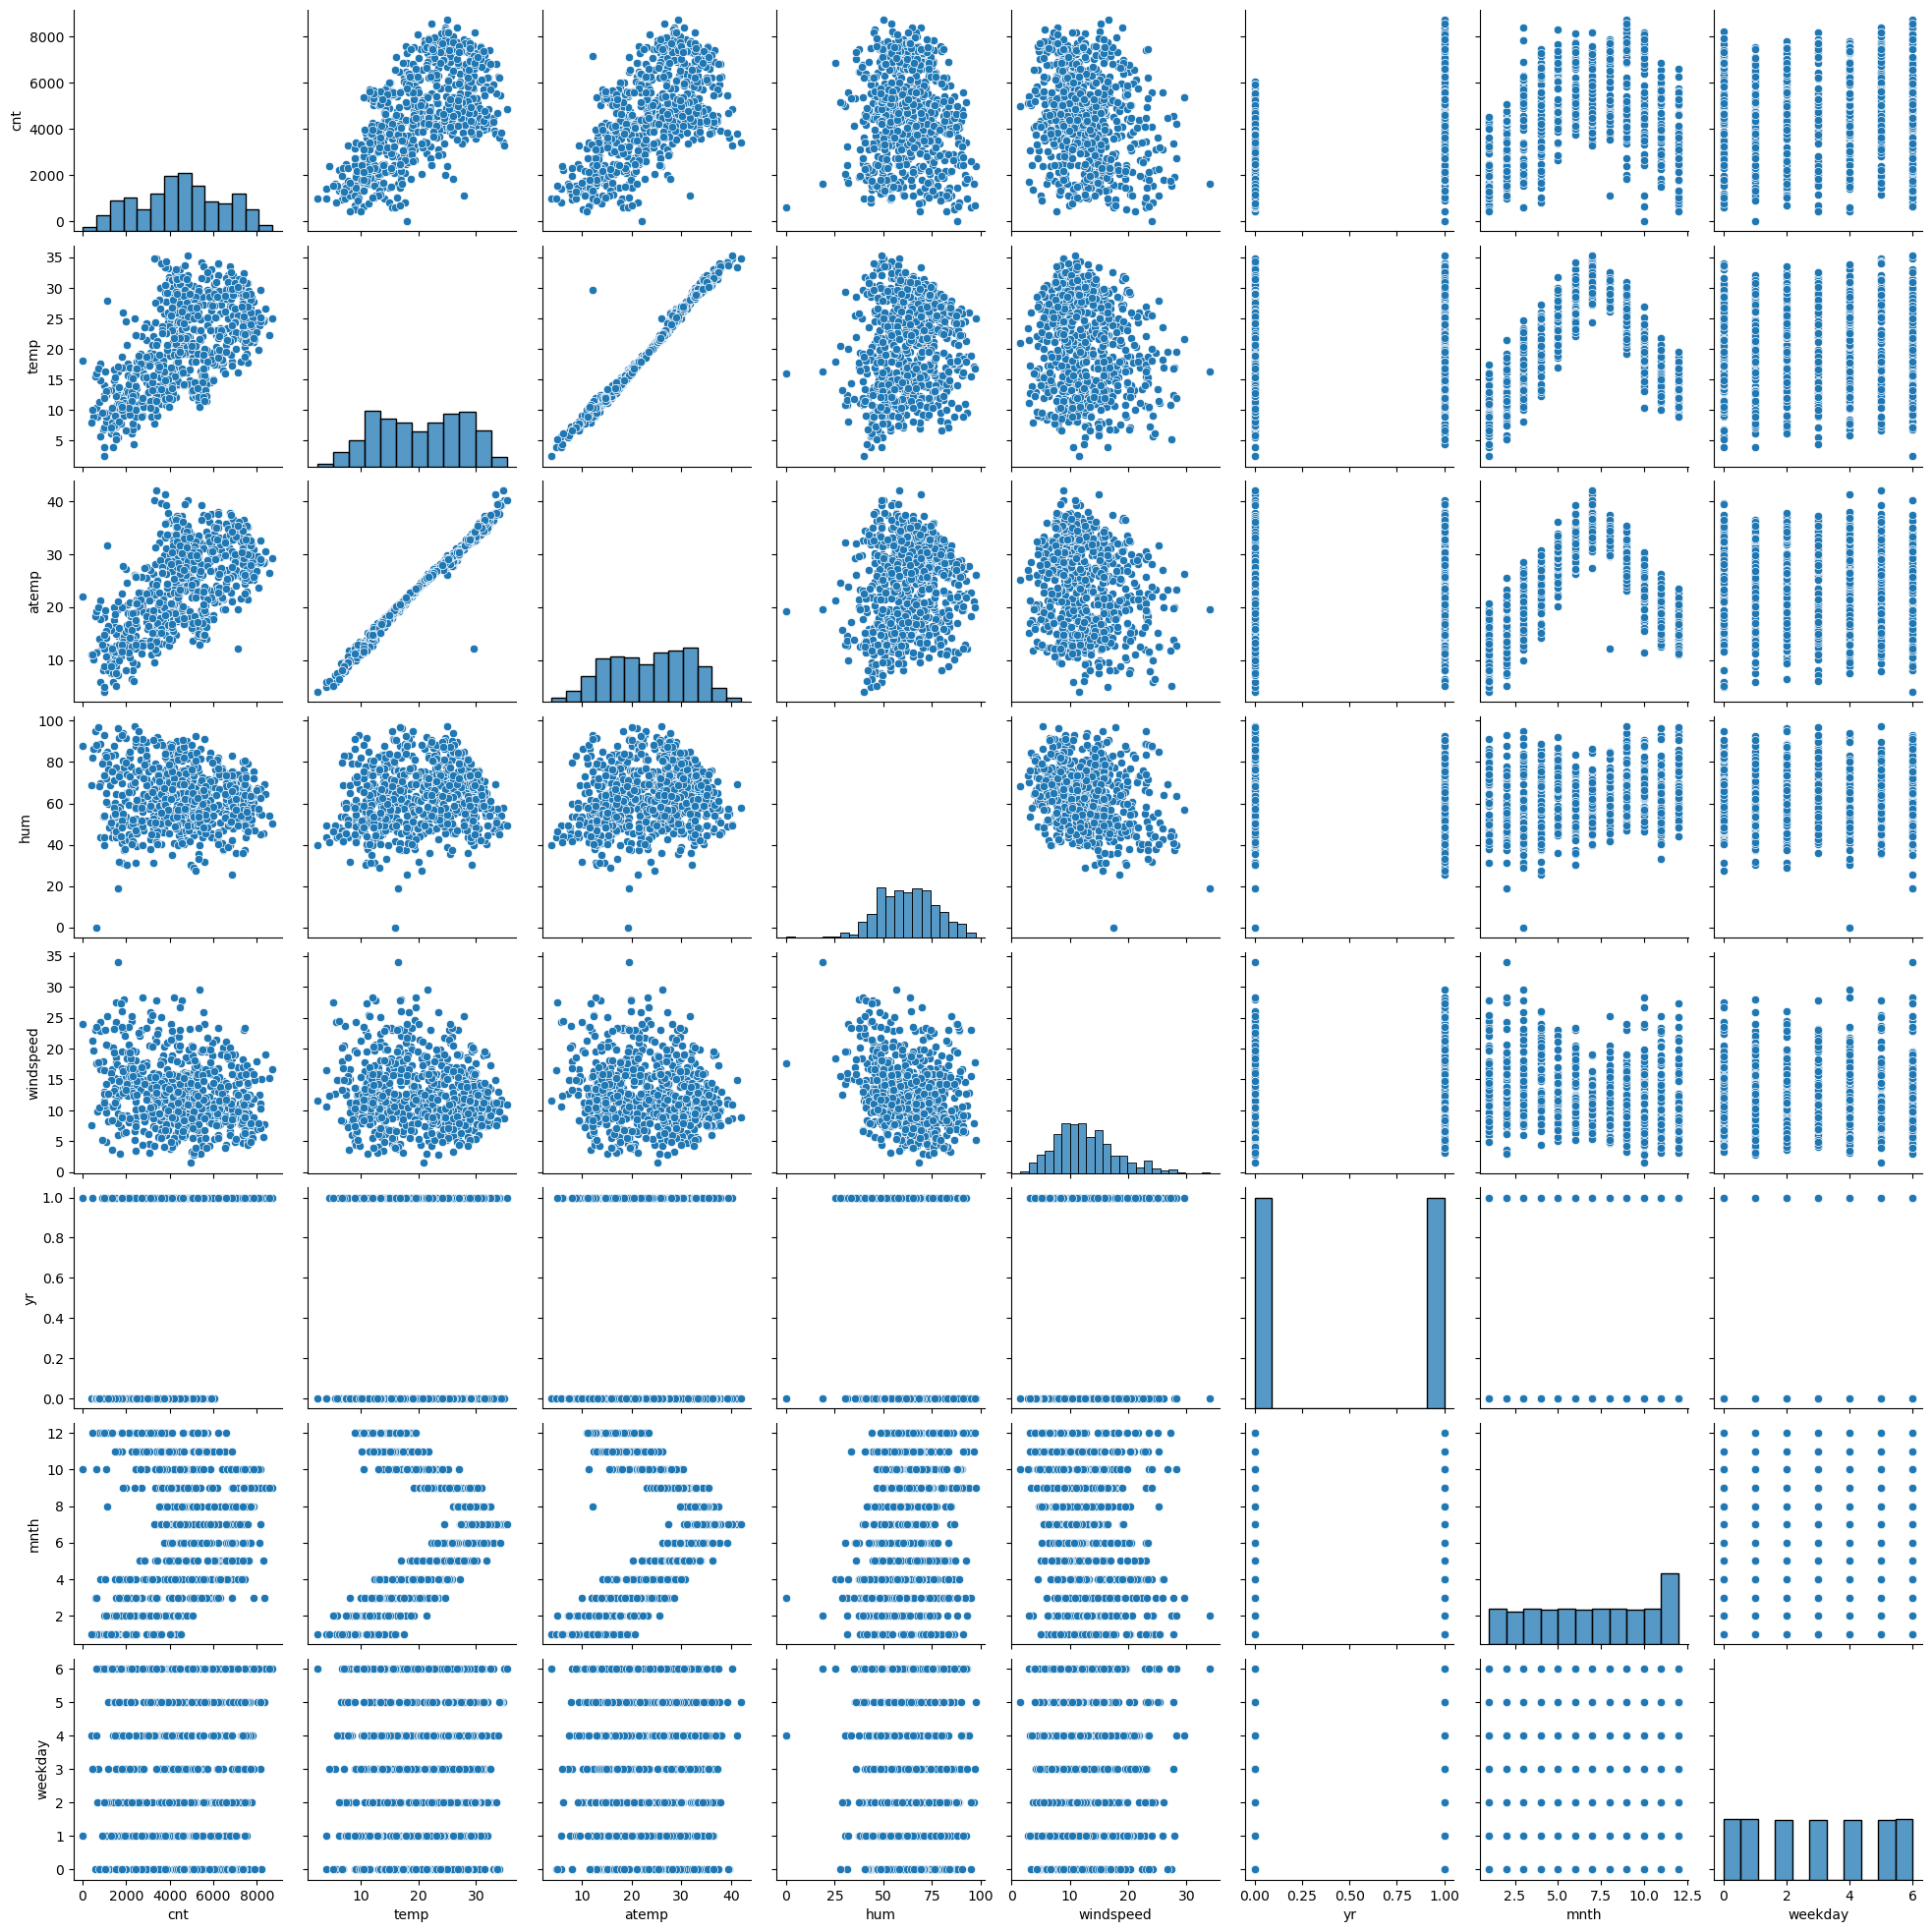

In [148]:
sns.pairplot(bike_numerical)
plt.show()

In [149]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Axes: xlabel='weathersit', ylabel='cnt'>

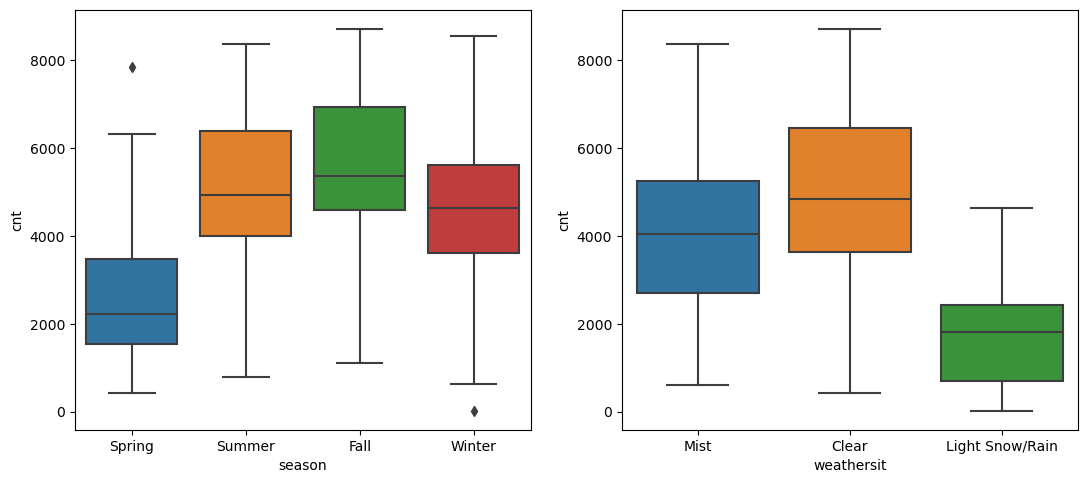

In [150]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

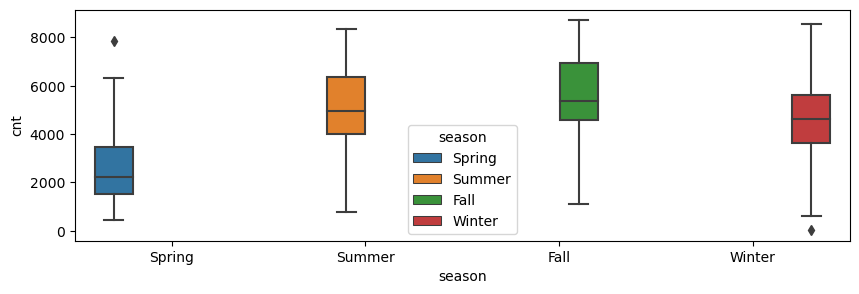

In [151]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = 'season', y = 'cnt', hue = 'season', data = bike)
plt.show()

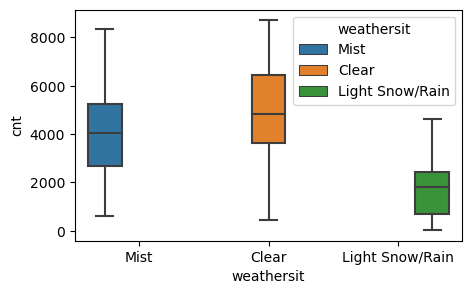

In [152]:
plt.figure(figsize = (5, 3))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'weathersit', data = bike)
plt.show()

# Step 3: Data Preparation
- Create dummy variabe to encode categorical variables  'season' and 'weathersit' 

In [153]:
# Create dummy variables for 'season' and 'weathersit'
season_dummies = pd.get_dummies(bike['season'], prefix='season', drop_first=True)
weathersit_dummies = pd.get_dummies(bike['weathersit'], prefix='weathersit', drop_first=True)

# Concatenate the dummy variables with the original dataframe
bike = pd.concat([bike, season_dummies, weathersit_dummies], axis=1)

# Drop the original 'season' and 'weathersit' columns as they are now encoded
bike.drop(['season', 'weathersit'], axis=1, inplace=True)


In [154]:
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


# Step 4: Splitting the data into training and testing sets

In [155]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [156]:
# Analyse outlier to determine which scaling startegy shall be used


# Function to calculate IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return data[outliers]

# Detect outliers in each column
temp_outliers = detect_outliers_iqr(bike['temp'])
atemp_outliers = detect_outliers_iqr(bike['atemp'])
hum_outliers = detect_outliers_iqr(bike['hum'])
windspeed_outliers = detect_outliers_iqr(bike['windspeed'])

# Display outliers
print("Temperature Outliers:\n", temp_outliers)
print("\n'Feels Like' Temperature Outliers:\n", atemp_outliers)
print("\nHumidity Outliers:\n", hum_outliers)
print("\nWind Speed Outliers:\n", windspeed_outliers)


Temperature Outliers:
 Series([], Name: temp, dtype: float64)

'Feels Like' Temperature Outliers:
 Series([], Name: atemp, dtype: float64)

Humidity Outliers:
 49    18.7917
68     0.0000
Name: hum, dtype: float64

Wind Speed Outliers:
 44     27.999836
49     34.000021
93     25.833257
94     26.000489
292    28.292425
382    27.833743
407    27.417204
420    28.250014
431    29.584721
432    27.791600
449    25.917007
665    26.666536
720    27.292182
Name: windspeed, dtype: float64


### Scaling the data using MinMaxScaler

In [157]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

In [158]:

# Features to be scaled
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed','cnt']



# Min-Max Scaling
#minmax_scaler = MinMaxScaler()
bike_train[features_to_scale] = minmax_scaler.fit_transform(bike_train[features_to_scale])


In [159]:
bike_train.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist
653,654,16-10-2019,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,922,6612,0.864243,0,0,1,0,0
576,577,31-07-2019,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658,0,0,0,0,0
426,427,03-03-2019,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255,1,0,0,0,1
728,729,30-12-2019,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096,1,0,0,0,0
482,483,28-04-2019,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973,0,1,0,0,1


In [160]:
bike_train.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,368.941176,0.507843,6.549020,0.025490,2.990196,0.676471,0.537262,0.512989,0.650369,0.320768,837.543137,3648.839216,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,209.868619,0.500429,3.468714,0.157763,2.017093,0.468282,0.225844,0.212385,0.145882,0.169797,675.921998,1580.336986,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,187.250000,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,373.000000,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,700.000000,3657.000000,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,553.750000,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,729.000000,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### columns (`casual`, `registered`, `dteday`, `instant`) are not needed as features in the model. 
#### The cnt is the target variable, 
    - casual and registered should not be included as they directly add up to cnt, 
    - dteday is a date column not needed for modeling, and instant is an index column.

In [161]:
bike_train = bike_train.drop('instant', axis=1)

In [162]:
bike_train = bike_train.drop( ['casual', 'registered', 'dteday'],axis=1)

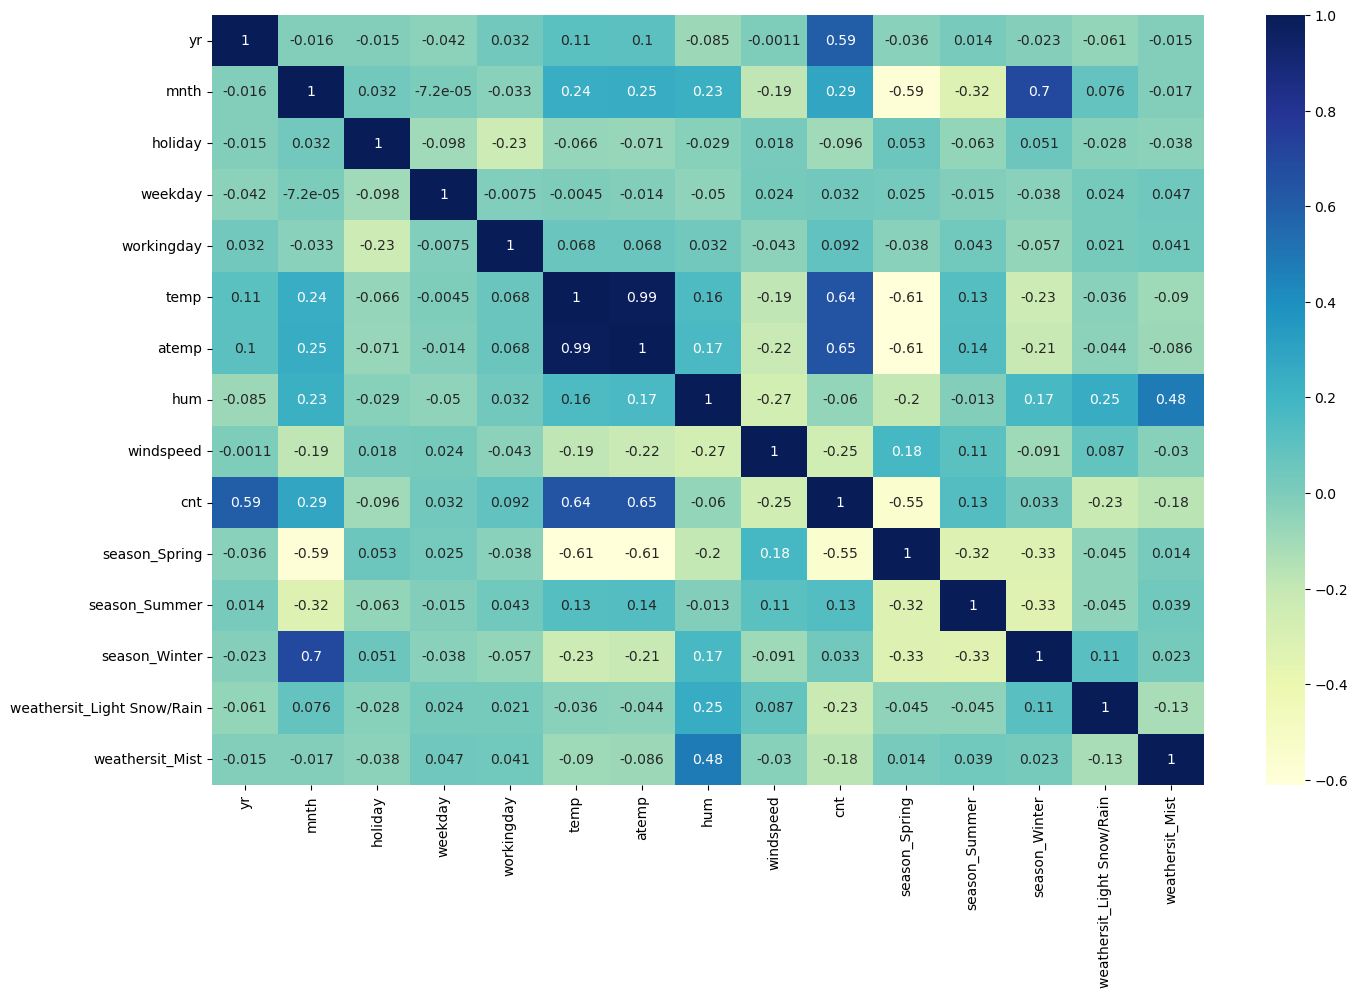

In [163]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### It can be noticed, `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

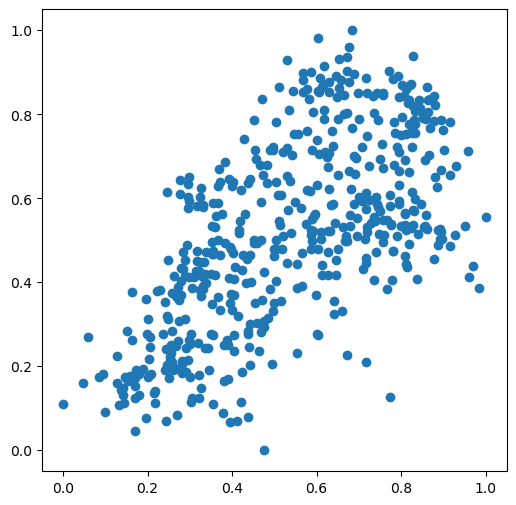

In [164]:
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp,bike_train.cnt)
plt.show()

#### So we pick `temp` as first variable and try to fit regression line on that

In [165]:
# dividing into X and Y sets for model building
y_train = bike_train.pop('cnt')
X_train = bike_train

# Step 5: Building a linear model

In [166]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [167]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

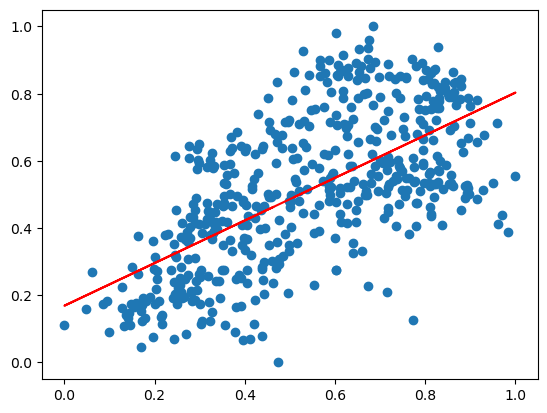

In [168]:
# visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.634*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [169]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           5.80e-61
Time:                        13:13:57   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [170]:
bike.shape

(730, 19)

## Building based on RFE

In [171]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

In [172]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm,10)             # running RFE
rfe = RFE(lm,n_features_to_select=19)
rfe = rfe.fit(X_train, y_train)

In [173]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [174]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow/Rain', 'weathersit_Mist'],
      dtype='object')

In [175]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [176]:
X_train_rfe = X_train[col]

In [177]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [178]:
lm = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model

In [179]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          1.69e-182
Time:                        13:13:57   Log-Likelihood:                 496.00
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     495   BIC:                            -898.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### `atemp` insignificant in presence of other variables, it can be dropped

In [180]:
X_train_new = X_train_rfe.drop(['atemp'], axis=1)

- Rebuilding the model without `atemp`

In [181]:
X_train_lm = sm.add_constant(X_train_new)

- Running the linear model

In [182]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [183]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          1.31e-183
Time:                        13:13:57   Log-Likelihood:                 495.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- Lets drop the column `mnth`

In [184]:
X_train_new = X_train_new.drop(['mnth'], axis=1)
# Rebuilding the model without `atemp`
X_train_lm = sm.add_constant(X_train_new)
# running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [185]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          1.00e-184
Time:                        13:13:57   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [186]:
#Check the columns
X_train_new.columns

Index(['const', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Snow/Rain', 'weathersit_Mist'],
      dtype='object')

In [187]:
# droppig the const column
X_train_new = X_train_new.drop(['const'], axis=1)

In [188]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,27.38
4,temp,15.70
6,windspeed,4.69
7,season_Spring,3.90
3,workingday,3.19
2,weekday,3.11
9,season_Winter,3.11
11,weathersit_Mist,2.28
8,season_Summer,2.27
0,yr,2.08


In [189]:
# Drop the hum Column
X_train_new = X_train_new.drop(['hum'], axis=1)
# Rebuilding the model without `hum`
X_train_lm = sm.add_constant(X_train_new)
# running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [190]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          9.96e-184
Time:                        13:13:57   Log-Likelihood:                 490.61
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     498   BIC:                            -906.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [191]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,5.26
5,windspeed,4.63
3,workingday,3.15
2,weekday,3.10
6,season_Spring,2.28
0,yr,2.07
7,season_Summer,1.85
8,season_Winter,1.75
10,weathersit_Mist,1.54
1,holiday,1.10


In [192]:
# lets drop the column workingday
X_train_new = X_train_new.drop(['workingday'], axis=1)
# Rebuilding the model without `workingday`
X_train_lm = sm.add_constant(X_train_new)
# running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [193]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.4
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          5.40e-184
Time:                        13:13:57   Log-Likelihood:                 488.39
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     499   BIC:                            -908.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [194]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.63
3,temp,4.36
2,weekday,3.10
5,season_Spring,2.12
0,yr,2.07
6,season_Summer,1.81
7,season_Winter,1.68
9,weathersit_Mist,1.54
8,weathersit_Light Snow/Rain,1.08
1,holiday,1.05


# Residual analysis of the train data

In [195]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

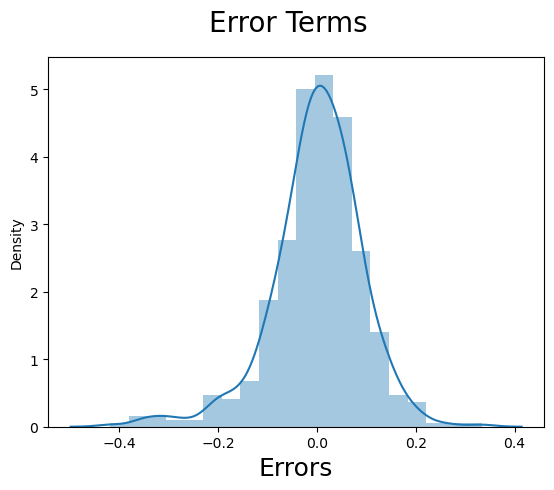

In [196]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making prediction

- Applying scaling on the test set

In [197]:

numerical_columns = ['temp','atemp', 'hum', 'windspeed','cnt']
print(numerical_columns)



['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [198]:
numerical_columns

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [199]:
#bike_test.head()
bike_test[numerical_columns] = minmax_scaler.transform(bike_test[numerical_columns])

In [200]:
bike_test.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow/Rain,weathersit_Mist
184,185,04-07-2018,0,7,1,1,0,0.831783,0.769660,0.657364,0.084219,3065,2978,0.692706,0,0,0,0,1
535,536,20-06-2019,1,6,0,3,1,0.901354,0.842587,0.610133,0.153728,872,5339,0.712034,0,1,0,0,0
299,300,27-10-2018,0,10,0,4,1,0.511964,0.496145,0.837699,0.334206,240,2419,0.303382,0,0,1,0,1
221,222,10-08-2018,0,8,0,3,1,0.881625,0.795343,0.437098,0.339570,884,3896,0.547400,0,0,0,0,0
152,153,02-06-2018,0,6,0,4,1,0.817246,0.741471,0.314298,0.537414,736,4232,0.569029,0,1,0,0,0


In [201]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [202]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [203]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

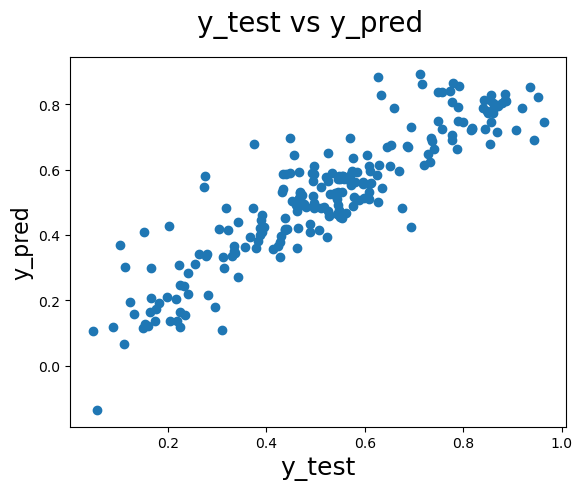

In [204]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [205]:
r2 = r2_score(y_test, y_pred)
r2

0.8058777271560252